## Lecture: The (Py)Tesseract Library

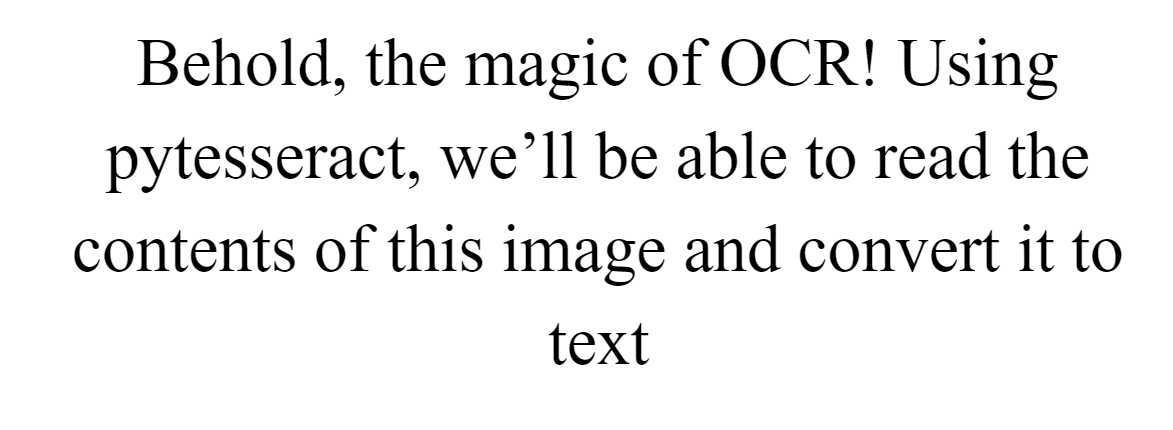

In [1]:
# We're going to start experimenting with tesseract using just a simple image of nice clean text.
# Lets first import Image from PIL and display the image text.png.
from PIL import Image

image = Image.open("text.png")
display(image)

In [14]:
# Great, we have a base image of some big clear text
# Lets import pytesseract and use the dir() fundtion to get a sense of what might be some interesting
# functions to play with
import pytesseract
dir(pytesseract)

ModuleNotFoundError: No module named 'pytesseract'

In [ ]:
# It looks like there are just a handful of interesting functions, and I think image_to_string
# is probably our best bet. Lets use the help() function to interrogate this a bit more 
help(pytesseract.image_to_string)

In [ ]:
# So this function takes an image as the first parameter, then there are a bunch of optional parameters,
# and it will return the results of the OCR. I think it's worth comparing this documentation string
# with the documentation we were receiving from the PILLOW module. Lets run the help command on the 
# Image resize function()
help(Image.Image.resize)

In [ ]:
# Notice how the PILLOW function has a bit more information in it. First it's using a specific format
# called reStructuredText, which is similar in intent to document markups such as HTML, the language of
# the web. The intent is to embed semantics in the documentation itself. For instance, in the resize()
# function we see the words "param size" with colons surrounding it. This allows documentation engines
# which create web docs from source code to link the parameter to the extended docs about that parameter.
# In this case the extended docs tell us that the size should be passed as a tuple of width and height.
# Notice how the docs for image_to_string, for instance, indicate that there is a "lang" parameter we can
# use, but then fail to say anything about what that parameter is for or what its format is.
#
# What this really means is that we need to dig deeper. Here's a quick hack if you want to look at the
# source code of a function -- you can use the inspect getsource() command and print the results
import inspect
src = inspect.getsource(pytesseract.image_to_string)
print(src)

In [ ]:
# There's actually another way in jupyter, and that's to append *two* question marks to the end of
# a given function or module. Other editors have similar features, and is a great reason to use a 
# software development environment
pytesseract.image_to_string??

In [ ]:
# We can see from the source code that there really isn't much more information about what the parameters
# are for this image_to_string function. This is because underneath the pytesseract library is calling a C++
# library which does all of the hard work, and the author just passes through all of the calls to the 
# underlying tesseract executable. This is a common issue when working with python libraries, and it means
# we need to do some web sleuthing in order to understand how we can interact with tesseract.
#
# In a case like this I just googled "tesseract command line parameters" and the first hit was what I was
# looking for, here's the URL: https://github.com/tesseract-ocr/tesseract/wiki/Command-Line-Usage
#
# This goes to a wiki page which describes how to call the tesseract executable, and as we read down we see
# that we can actually have tesseract use multiple languages in its detection, such as English and Hindi, by
# passing them in as "eng+hin". Very cool. 

In [ ]:
# One last thing to mention - the image_to_string() function takes in an "image", but the docs don't
# really describe what this image is underneath. Is it a string to an image file? A PILLOW image?
# Something else?
#
# Again we have to sleuth (and/or experiment) to understand what we should do. If we look at the source
# code for the pytesseract library, we see that there is a function called run_and_get_output(). Here's
# a link to that function on the author's github account:
# https://github.com/madmaze/pytesseract/blob/d1596f7f59a517ad814b7d810ccdef7d33763221/src/pytesseract.py#L199
#
# In this function we see that one of the first things which happens is the image is saved through
# the save_image() function. Here's that line of code:
# https://github.com/madmaze/pytesseract/blob/d1596f7f59a517ad814b7d810ccdef7d33763221/src/pytesseract.py#L116
#
# And we see there that another function is called, prepare(image), which actually loads the image as a
# PILLOW image file. So yes, sending a PIL image file is appropriate use for this function! It sure would
# have been useful for the author to have included this information in reStructuredText to help us not have
# to dig through the implementation. But, this is an open source project -- maybe you would like to contribute
# back better documentation?
#
# Hint: The doc line we needed was :param image: A PIL Image.Image file or an ndarray of bytes
#
# In the end, we often don't do this full level of investigation, and we just experiment and try things. It
# seems likely that a PIL Image.Image would work, given how well known PIL is in the python world. But still,
# as you explore and use different libraries you'll see a breadth of different documentation norms, so it's
# useful to know how to explore the source code. And now that you're at the end of this course, you've got
# the skills to do so!
#
# Ok, lets try and run tesseract on this image
text = pytesseract.image_to_string(image)
print(text)

In [ ]:
# Looks great! We see that the output includes new line characters, and faithfully represents the text
# but doesn't include any special formatting. Lets go on and look at something with a bit more nuance to it.